## Matias Padron Michele Yanez - Algoritmo Regresión Logística

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
data = pd.read_csv('data_evaluacion_limpia_categorical.csv')
data

,Unnamed: 0,edad,clase_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,ganancia_capital,perdida_capital,horas_por_semana,pais,sexo,salario
0,0,50,6,83311,10,13,3,4,1,5,0,0,13,39,True,False
1,1,38,4,215646,12,9,1,6,2,5,0,0,40,39,True,False
2,2,53,4,234721,2,7,3,6,1,3,0,0,40,39,True,False
3,3,28,4,338409,10,13,3,10,6,3,0,0,40,5,False,False
4,4,37,4,284582,13,14,3,4,6,5,0,0,40,39,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,48836,39,4,215419,10,13,1,10,2,5,0,0,36,39,False,False
48837,48837,64,4,321403,12,9,7,3,3,3,0,0,40,39,True,False
48838,48838,38,4,374983,10,13,3,10,1,5,0,0,50,39,True,False
48839,48839,44,4,83891,10,13,1,1,4,2,5455,0,40,39,True,False


In [62]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,edad,clase_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,ganancia_capital,perdida_capital,horas_por_semana,pais,sexo,salario
0,50,6,83311,10,13,3,4,1,5,0,0,13,39,True,False
1,38,4,215646,12,9,1,6,2,5,0,0,40,39,True,False
2,53,4,234721,2,7,3,6,1,3,0,0,40,39,True,False
3,28,4,338409,10,13,3,10,6,3,0,0,40,5,False,False
4,37,4,284582,13,14,3,4,6,5,0,0,40,39,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,4,215419,10,13,1,10,2,5,0,0,36,39,False,False
48837,64,4,321403,12,9,7,3,3,3,0,0,40,39,True,False
48838,38,4,374983,10,13,3,10,1,5,0,0,50,39,True,False
48839,44,4,83891,10,13,1,1,4,2,5455,0,40,39,True,False


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   edad              48841 non-null  int64
 1   clase_trabajo     48841 non-null  int64
 2   peso_final        48841 non-null  int64
 3   educacion         48841 non-null  int64
 4   num_educacion     48841 non-null  int64
 5   estado_civil      48841 non-null  int64
 6   ocupacion         48841 non-null  int64
 7   relacion          48841 non-null  int64
 8   raza              48841 non-null  int64
 9   ganancia_capital  48841 non-null  int64
 10  perdida_capital   48841 non-null  int64
 11  horas_por_semana  48841 non-null  int64
 12  pais              48841 non-null  int64
 13  sexo              48841 non-null  bool 
 14  salario           48841 non-null  bool 
dtypes: bool(2), int64(13)
memory usage: 4.9 MB


<Axes: xlabel='salario', ylabel='count'>

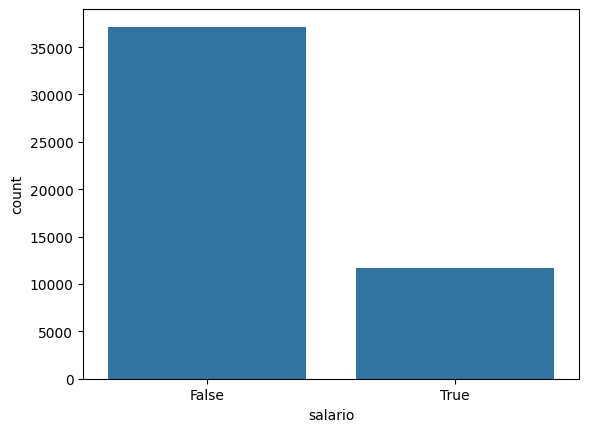

In [64]:
sns.countplot(x='salario', data=data)

## Entrenamiento del modelo

In [65]:
x = data.drop(columns=['salario']).values
y = data['salario'].values

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [67]:
lrm = LogisticRegression()# algoritmo a utilizar
lrm.fit(x_train,y_train)

C:\Users\MATIAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = lrm.predict(x_test)

In [75]:
# Evaluacion del modelo
print('Train Accuracy :', (lrm.score(x_train, y_train))*100,"%")
print('Test Accuracy :', (lrm.score(x_test, y_test))*100,"%")
print("Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy : 78.91950391950392 %
Test Accuracy : 79.65604313109942 %
Accuracy: 0.7965604313109943


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.95      0.88     11166
        True       0.66      0.30      0.42      3487

    accuracy                           0.80     14653
   macro avg       0.74      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653



In [71]:
confusion_matrix(y_test, y_pred)

array([[10614,   552],
       [ 2429,  1058]], dtype=int64)